# Examples with the Molecular lines [v1.1]

In [1]:
%matplotlib inline

In [2]:
# imports
import numpy as np
from astropy import units as u

from linetools.lists.linelist import LineList
from linetools.spectralline import AbsLine
from linetools.analysis.voigt import voigt_from_abslines

## Load H2

In [3]:
h2 = LineList('H2')
h2

<LineList: H2; 397 transitions sorted by ['wrest'].>

### Show some data

In [4]:
h2._data[0:5]

A,el,nj,nk,group,name,Ek,f,wrest,Ref,mol,Ej,Am,ion,Ex,Jj,Jk,Z,gk,gj,gamma,Id
1 / s,,,,,,1 / cm,,Angstrom,,,1 / cm,,,1 / cm,,,,,,1 / s,
float64,int64,int64,int64,int64,str12,float64,float64,float64,str14,str2,float64,int64,int64,float64,float64,float64,int64,int64,int64,float64,int64
--,2,19,0,8,B19-0P(1),--,0.001315,911.967,Abgrall93,H2,--,--,--,--,0.0,1.0,--,9,--,743800000.0,0
--,3,6,0,8,C6-0P(5),--,0.0006844,912.186,Abgrall93,H2,--,--,--,--,4.0,5.0,--,33,--,699700000.0,1
--,2,20,0,8,B20-0R(4),--,0.002472,912.235,Abgrall93,H2,--,--,--,--,5.0,4.0,--,9,--,728900000.0,2
--,2,19,0,8,B19-0R(2),--,0.002015,912.95,Abgrall93,H2,--,--,--,--,3.0,2.0,--,5,--,758600000.0,3
--,2,20,0,8,B20-0P(4),--,0.001162,913.605,Abgrall93,H2,--,--,--,--,3.0,4.0,--,9,--,726000000.0,4


## Generate a line

In [5]:
h2_B3_0P3 = AbsLine('B3-0P(3)', linelist=h2)

In [6]:
h2_B3_0P3

<AbsLine: B3-0P(3), z=0.0000 wrest=1070.1410 Angstrom, f=0.007537>

## Generate a model

### Attributes

In [7]:
h2_B3_0P3.attrib['N'] = 10**14./u.cm**2  # log N
h2_B3_0P3.attrib['b'] = 25.*u.km/u.s
h2_B3_0P3.setz(2.)
h2_B3_0P3

<AbsLine: B3-0P(3), z=2.0000 wrest=1070.1410 Angstrom, f=0.007537>

### Spectrum

In [8]:
wave = np.arange(3000., 3600., 0.04) * u.AA

### Model

In [9]:
vmodel = voigt_from_abslines(wave, h2_B3_0P3, fwhm=3.)

/data/Projects/Python/linetools/linetools/analysis/voigt.py:187: UserWarning: Using a sub-grid wavelength array because the input array is too coarse.
  warnings.warn('Using a sub-grid wavelength array because the input array is too coarse.')
/data/Projects/Python/linetools/linetools/analysis/voigt.py:188: UserWarning: Will return values rebinned to the input array.
  warnings.warn('Will return values rebinned to the input array.')


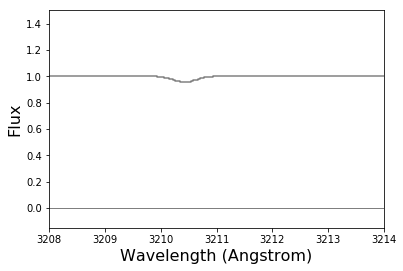

In [10]:
vmodel.plot(xlim=[3208.,3214.])

### Now a strong one

In [11]:
h2_B3_0R0 = AbsLine('B3-0R(0)', linelist=h2)

In [12]:
h2_B3_0R0.data

{'A': <Quantity 0. 1 / s>,
 'Am': masked,
 'Ej': <Quantity 0. 1 / cm>,
 'Ek': <Quantity 0. 1 / cm>,
 'Ex': <Quantity 0. 1 / cm>,
 'Id': 331,
 'Jj': 1.0,
 'Jk': 0.0,
 'Ref': 'Abgrall93',
 'Z': masked,
 'el': 2,
 'f': 0.0179,
 'gamma': <Quantity 1.534e+09 1 / s>,
 'gj': masked,
 'gk': 1,
 'group': 8,
 'ion': masked,
 'mol': 'H2',
 'name': 'B3-0R(0)',
 'nj': 3,
 'nk': 0,
 'wrest': <Quantity 1062.882 Angstrom>}

In [13]:
# Setup the line
h2_B3_0R0.attrib['N'] = 10**19./u.cm**2  # log N
h2_B3_0R0.attrib['b'] = 10.*u.km/u.s
h2_B3_0R0.setz(0.)

In [14]:
wv_array = np.arange(1060,1100, 0.00001) * u.AA

In [15]:
vmodel2 = voigt_from_abslines(wv_array, h2_B3_0R0, fwhm=3.)

#### Plot

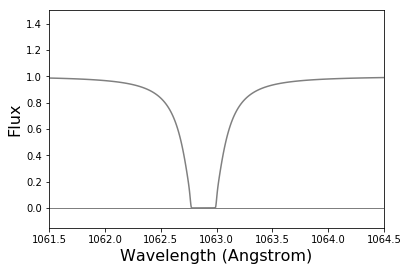

In [16]:
vmodel2.plot(xlim=[1061.5,1064.5])